# Task 3- Explore Unsupervised Machine Learning

## Objective




###### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In [35]:
# Importing all libraries required in this notebook
import pandas as pd
import statistics as st
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy import stats

In [14]:
# Load the iris dataset
iris=pd.read_csv("C:\SamFiles\INTERNASHALA TRAINING\SPARKS Foundation\Task 3\Iris.csv")
print("DATA LOADED SUCCESFULLY")

DATA LOADED SUCCESFULLY


In [15]:
#Printing the first 10 rows
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Basic statistics of the dataset

In [16]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Visualizations

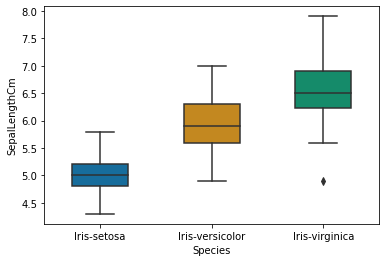

In [23]:
#Boxplots of Sepal lengths by Different Species of Iris
sns.boxplot(y='SepalLengthCm',x='Species', data=iris, width=0.5, palette="colorblind")

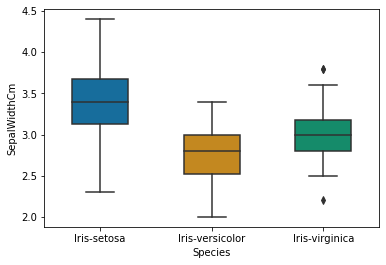

In [24]:
#Boxplots of Sepal widths by Different Species of Iris
sns.boxplot(y='SepalWidthCm',x='Species', data=iris, width=0.5, palette="colorblind")

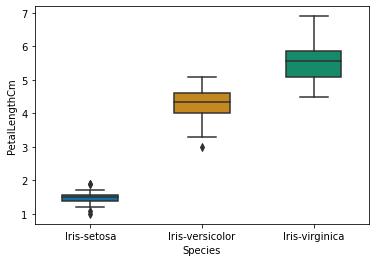

In [25]:
#Boxplots of Petal lengths by Different Species of Iris
sns.boxplot(y='PetalLengthCm',x='Species', data=iris, width=0.5, palette="colorblind")

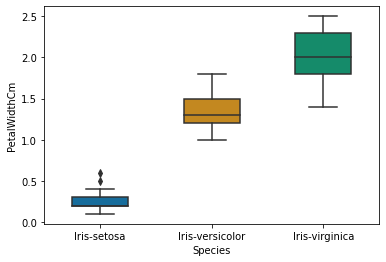

In [26]:
#Boxplots of Petal widths by Different Species of Iris
sns.boxplot(y='PetalWidthCm',x='Species', data=iris, width=0.5, palette="colorblind")

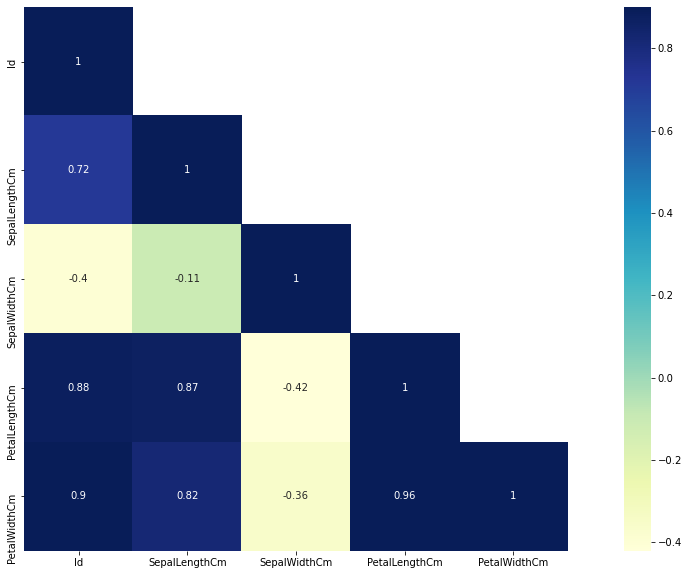

In [28]:
#Generating Correlation Heat map
corr = iris.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

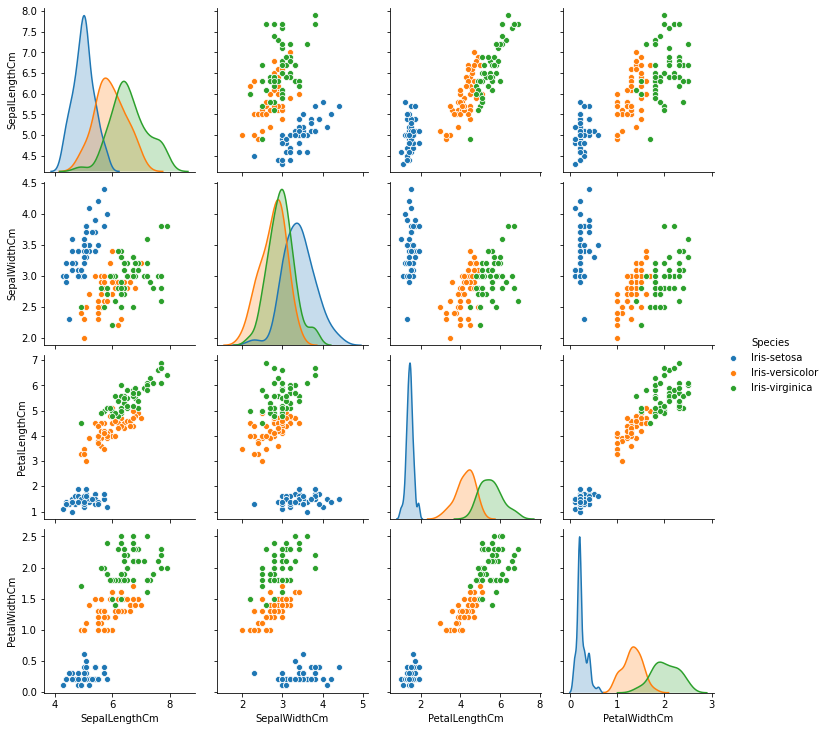

In [34]:
sns.pairplot(iris.iloc[:,[1,2,3,4,5]],hue='Species')

## Elbow method to obtain the optimum number of clusters

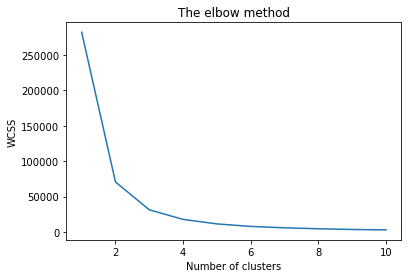

In [64]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = None)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# Observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

###### We observe that the optimum number of clusters is 3

In [70]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = None)
y_kmeans = kmeans.fit_predict(x)

In [71]:
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### Visualising the clusters

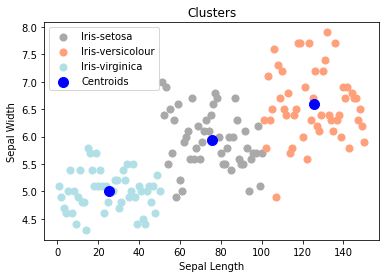

In [72]:
#Visualization for Sepal Width and length
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'darkgrey', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'lightsalmon', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'powderblue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

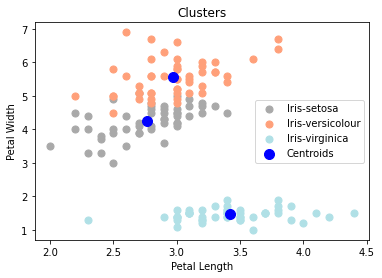

In [74]:
#Visualization for Petal Width and length
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 50, c = 'darkgrey', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 50, c = 'lightsalmon', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 50, c = 'powderblue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()